In [8]:
import pandas as pd
import scipy
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.mixture import GaussianMixture


Peaks:  [0.0167 0.0463 0.0665 0.0924 0.1302 0.1539 0.1904 0.213  0.2348 0.2659
 0.2901 0.3165 0.3489 0.388  0.409  0.4412 0.4666 0.487  0.5202 0.5405
 0.5611 0.5813 0.6178 0.64   0.6623 0.6898 0.7436 0.7758 0.7965 0.8212
 0.8561 0.8763 0.8979 0.9592 0.9862 1.0069 1.0313 1.0622 1.0824 1.1114
 1.1399 1.165  1.1852 1.2057 1.2317 1.2681 1.2944 1.3144 1.358  1.3783
 1.4133 1.4351 1.4643 1.4901 1.5106 1.5354 1.5707 1.5929 1.6163 1.6363
 1.6679 1.6881 1.7085 1.7318 1.7576 1.7824 1.8034 1.8238 1.8642 1.8844
 1.905  1.9665 1.9908 2.0281 2.0634 2.0861 2.1142 2.1356 2.1593 2.1797
 2.2003 2.2338 2.2626 2.2852 2.3096 2.3322 2.3548 2.3755 2.3959 2.4322
 2.4662 2.4862 2.5066 2.5268 2.5512 2.574  2.5971 2.6194 2.6848 2.7102
 2.7306 2.7903 2.8105 2.8354 2.8622 2.8914 2.9276 2.963  2.9835 3.0147
 3.0349 3.0598 3.0968 3.1213 3.1418 3.1623 3.2084 3.2289 3.2571 3.2773
 3.3031 3.3415 3.3622 3.3822 3.4035 3.4237 3.4442 3.4676 3.5038 3.5299
 3.5503 3.5819 3.6026 3.6231 3.6565 3.6803 3.7111 3.7459 3.7833 3.803

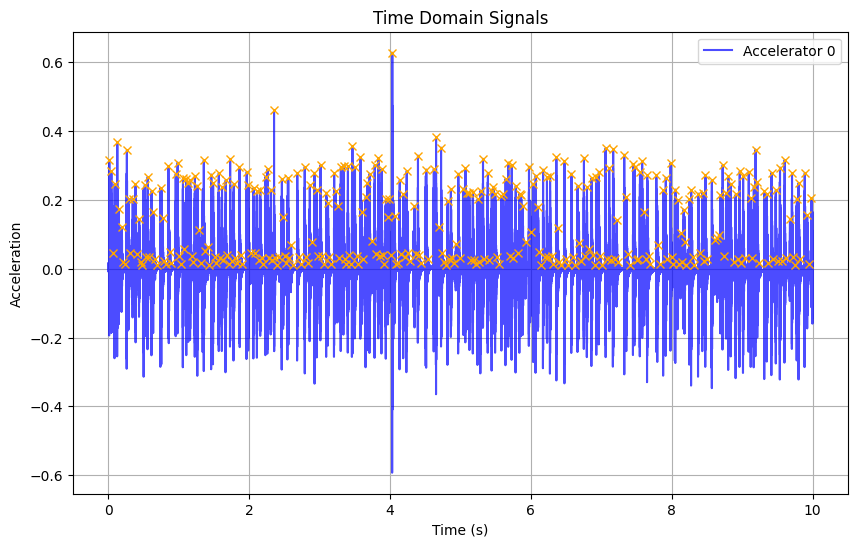

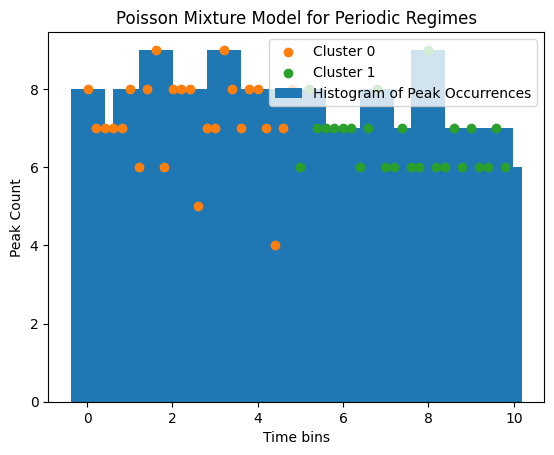

In [9]:

file = r"C:\Users\Andrew\Documents\Acoustic-Space-Boiling\Data\After_May\MATLAB 3-59 PM Tue, Sep 17, 2024 Run7 .csv"

file = r"C:\Users\Andrew\Documents\Acoustic-Space-Boiling\Data\After_May\MATLAB 1-55 PM Fri, Jun 14, 2024 Run5 .csv"

file = r"C:\Users\Andrew\Documents\Acoustic-Space-Boiling\Data\After_May\MATLAB 4-09 PM Mon, Aug 26, 2024 Run7 .csv"

data = pd.read_csv(file, index_col="Time")
time = data.index

acceleration0 = data['0'] #Using only accelerometer 0

peaks, _ = scipy.signal.find_peaks(acceleration0, distance = 200, height=.01) #This height needs to be configured
peaks = peaks / 10000 #time of peaks

print("Peaks: ", peaks)
print("Peak values: ", data.loc[peaks])

# 2. Plot the time domain signals
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration0, label='Accelerator 0', color='blue', alpha=0.7)
#plt.plot(time, acceleration1, label='Accelerator 1', color='orange', alpha=0.7)
plt.plot(peaks, acceleration0.loc[peaks], "x", color="orange")
plt.title('Time Domain Signals')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of peak occurrences (to model periodicity)
hist, bin_edges = np.histogram(peaks, bins=50)

# Fit a Poisson Mixture Model (using GaussianMixture as an approximation)
X = bin_edges[:-1].reshape(-1, 1)  # Reshape for sklearn
gmm = GaussianMixture(n_components=2, covariance_type="full")  # Adjust n_components as needed
gmm.fit(X, hist)

# Predict cluster assignments
labels = gmm.predict(X)

# Plot the results
plt.bar(X.flatten(), hist, label="Histogram of Peak Occurrences")
for i, label in enumerate(np.unique(labels)):
    plt.scatter(X.flatten()[labels == label], hist[labels == label], label=f"Cluster {label}")

plt.xlabel("Time bins")
plt.ylabel("Peak Count")
plt.legend()
plt.title("Poisson Mixture Model for Periodic Regimes")
plt.show()

               0         1
Time                      
0.0000 -0.003066 -0.004151
0.0001 -0.005737 -0.009416
0.0002 -0.007401 -0.012355
0.0003 -0.003986 -0.010991
0.0004 -0.003677 -0.002696
...          ...       ...
0.7995  0.017056  0.008084
0.7996  0.008640  0.009315
0.7997  0.005515  0.001556
0.7998  0.011020  0.004263
0.7999 -0.004319  0.003936

[8000 rows x 2 columns]


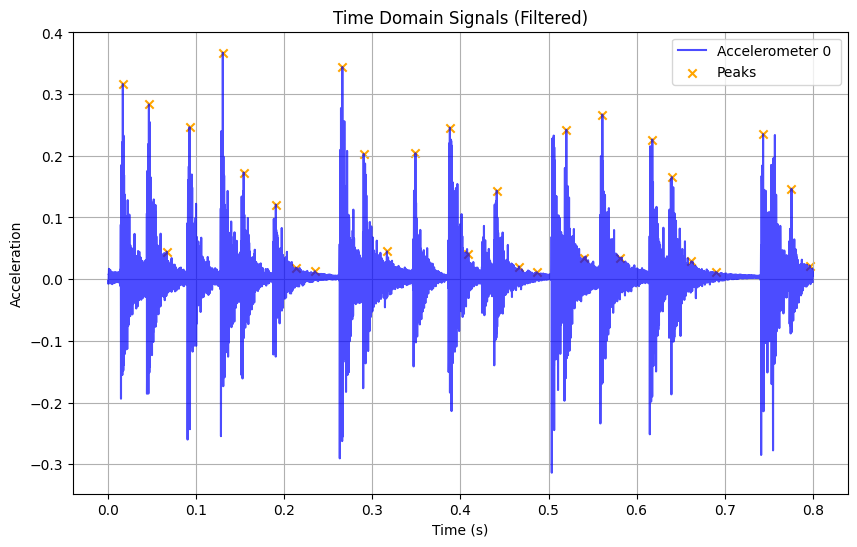

In [23]:
# Load data
file = r"C:\Users\Andrew\Documents\Acoustic-Space-Boiling\Data\After_May\MATLAB 4-09 PM Mon, Aug 26, 2024 Run7 .csv"
data = pd.read_csv(file, index_col="Time")

dataTimeShortened = data.iloc[0:8000]

print(dataTimeShortened)

time = dataTimeShortened.index

# Extract accelerometer data
acceleration0 = dataTimeShortened['0']  # Using only accelerometer 0


# Find peaks
peaks, properties = scipy.signal.find_peaks(acceleration0.dropna(), distance=200, height=0.01)

# Convert peak indices to time
peaks_time = acceleration0.dropna().index[peaks]

# Get peak values
peak_values = acceleration0.loc[peaks_time]

# Plot the time domain signals
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration0, label='Accelerometer 0 ', color='blue', alpha=0.7)
plt.scatter(peaks_time, peak_values, color="orange", marker="x", label="Peaks")
plt.title('Time Domain Signals (Filtered)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()


(array([3.704e+03, 1.564e+03, 7.750e+02, 4.940e+02, 3.040e+02, 2.160e+02,
        1.600e+02, 1.290e+02, 1.140e+02, 9.600e+01, 8.400e+01, 5.600e+01,
        4.700e+01, 4.100e+01, 3.800e+01, 2.800e+01, 2.900e+01, 1.800e+01,
        1.700e+01, 9.000e+00, 1.600e+01, 9.000e+00, 5.000e+00, 1.000e+01,
        7.000e+00, 6.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.57015228e-06, 9.18161201e-03, 1.83606539e-02, 2.75396957e-02,
        3.67187376e-02, 4.58977795e-02, 5.50768213e-02, 6.42558632e-02,
        7.34349051e-02, 8.26139469e-02, 9.17929888e-02, 1.00972031e-01,
        1.10151073e-01, 1.19330114e-01, 1.28509156e-01, 1.37688198e-01,
        1.46867240e-01, 1.56046282e-01, 1.65225324e-01, 1.74404366e-01,
        1.83583407e-01, 1.92762449e-01, 2.01941491e-01, 2.11120533e-01,
        2.20299575e-01, 2.29478617e-01, 2.38657659e-01, 2.47836700e-01

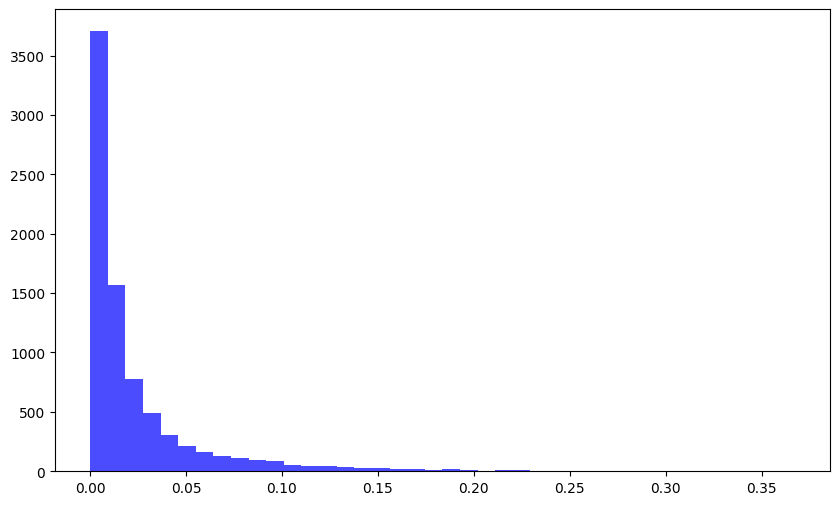

In [26]:
# Plot the time domain signals
plt.figure(figsize=(10, 6))
plt.hist(np.abs(acceleration0), label='Accelerometer 0 ', color='blue', alpha=0.7, bins = 40)

               0         1
Time                      
0.0000 -0.002212  0.002183
0.0001 -0.002135  0.002310
0.0002 -0.002229  0.002273
0.0003 -0.002198  0.002237
0.0004 -0.002176  0.002113
...          ...       ...
0.7995 -0.000058  0.001494
0.7996 -0.000301  0.001408
0.7997 -0.000247  0.001271
0.7998 -0.000085  0.001450
0.7999 -0.000125  0.001359

[8000 rows x 2 columns]


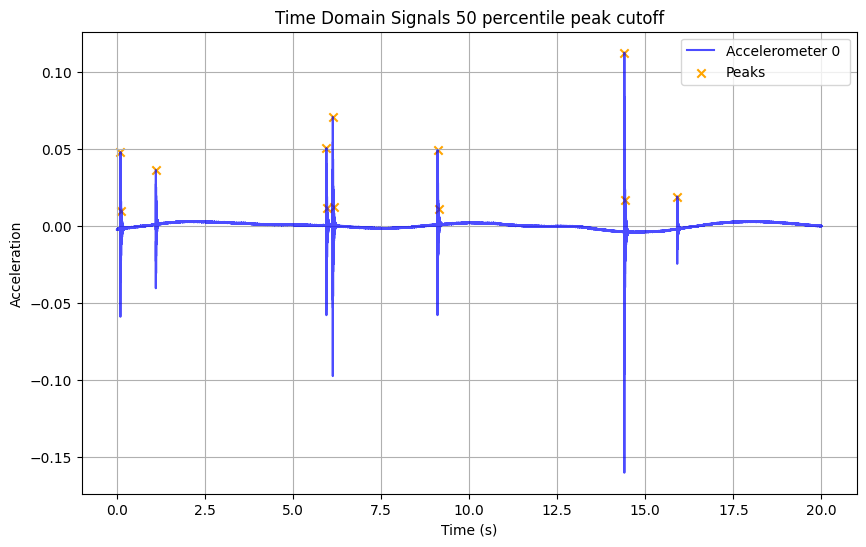

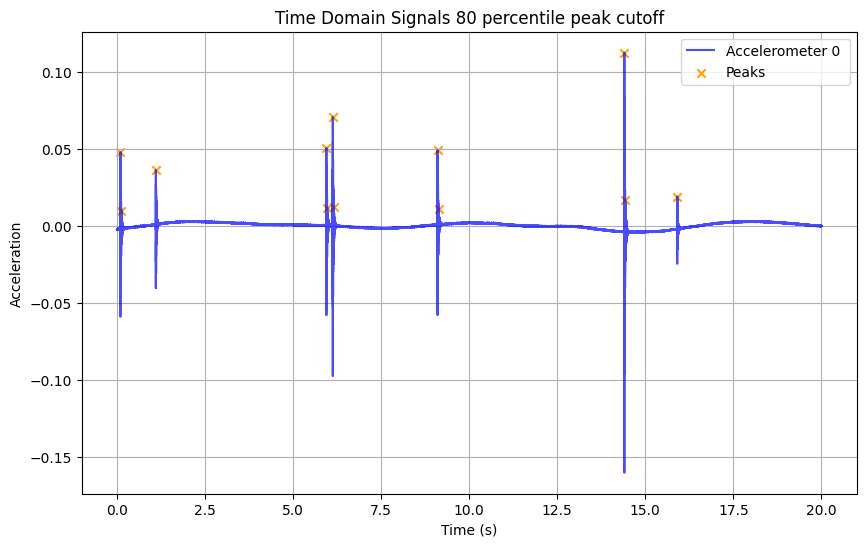

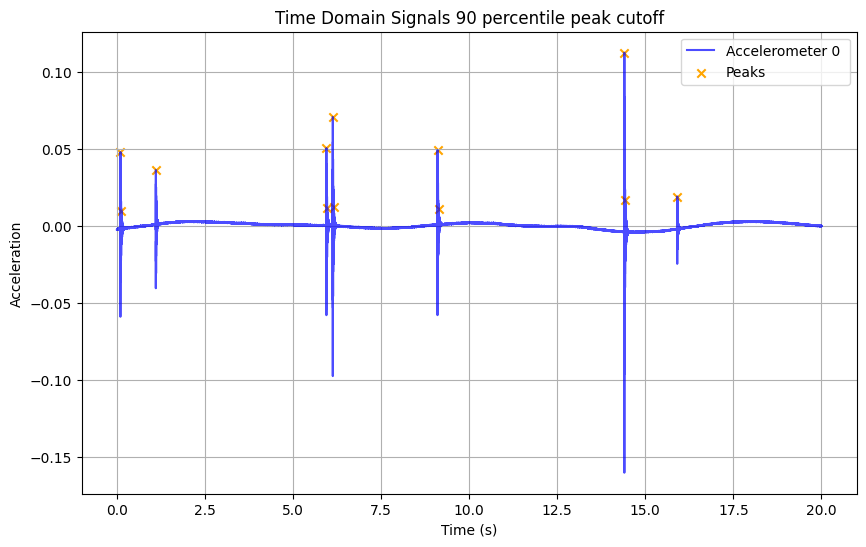

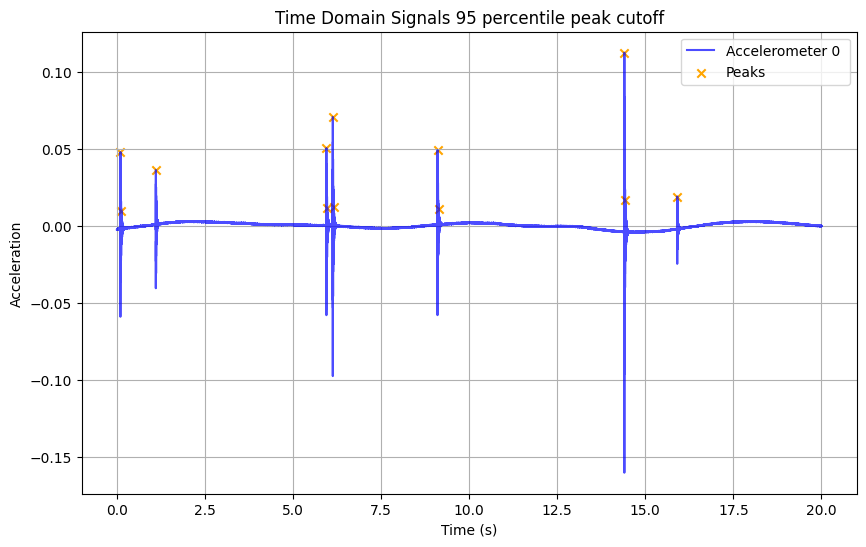

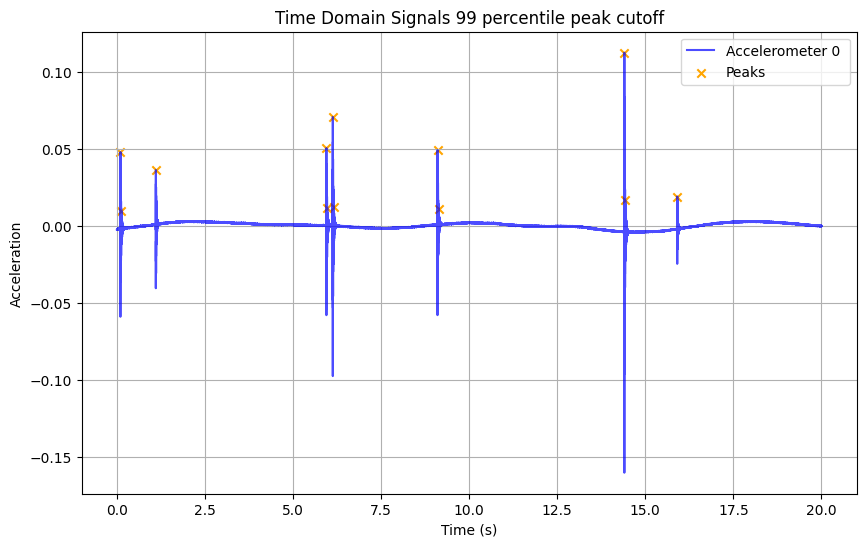

In [39]:
# print(np.percentile(acceleration0, 50))
# print(np.percentile(acceleration0, 80))
# print(np.percentile(acceleration0, 90))
# print(np.percentile(acceleration0, 95))
# print(np.percentile(acceleration0, 99))

percentile_list = [
    50,
    80,
    90,
    95,
    99
]

# Load data
file = r"C:\Users\Andrew\Documents\Acoustic-Space-Boiling\Data\After_May\MATLAB 12-46 PM Tue, Sep 10, 2024 Run6 .csv"
data = pd.read_csv(file, index_col="Time")

dataTimeShortened = data.iloc[0:8000]

print(dataTimeShortened)

time = data.index

# Extract accelerometer data
acceleration0full = data['0']

acceleration0 = dataTimeShortened['0']  # Using only accelerometer 0



for percentile in percentile_list:

    # Find peaks
    peaks, properties = scipy.signal.find_peaks(acceleration0full.dropna(), distance=200, height=max(np.percentile(acceleration0full, percentile), .01))

    # Convert peak indices to time
    peaks_time = acceleration0full.dropna().index[peaks]

    # Get peak values
    peak_values = acceleration0full.loc[peaks_time]

    # Plot the time domain signals
    plt.figure(figsize=(10, 6))
    plt.plot(time, acceleration0full, label='Accelerometer 0 ', color='blue', alpha=0.7)
    plt.scatter(peaks_time, peak_values, color="orange", marker="x", label="Peaks")
    plt.title(f'Time Domain Signals {percentile} percentile peak cutoff')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    plt.show()